<a href="https://colab.research.google.com/github/Blvisse/DSProjects/blob/master/BankAuth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [2]:
files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


{'BankNote_Authentication.csv': b'variance,skewness,curtosis,entropy,class\r\n3.6216,8.6661,-2.8073,-0.44699,0\r\n4.5459,8.1674,-2.4586,-1.4621,0\r\n3.866,-2.6383,1.9242,0.10645,0\r\n3.4566,9.5228,-4.0112,-3.5944,0\r\n0.32924,-4.4552,4.5718,-0.9888,0\r\n4.3684,9.6718,-3.9606,-3.1625,0\r\n3.5912,3.0129,0.72888,0.56421,0\r\n2.0922,-6.81,8.4636,-0.60216,0\r\n3.2032,5.7588,-0.75345,-0.61251,0\r\n1.5356,9.1772,-2.2718,-0.73535,0\r\n1.2247,8.7779,-2.2135,-0.80647,0\r\n3.9899,-2.7066,2.3946,0.86291,0\r\n1.8993,7.6625,0.15394,-3.1108,0\r\n-1.5768,10.843,2.5462,-2.9362,0\r\n3.404,8.7261,-2.9915,-0.57242,0\r\n4.6765,-3.3895,3.4896,1.4771,0\r\n2.6719,3.0646,0.37158,0.58619,0\r\n0.80355,2.8473,4.3439,0.6017,0\r\n1.4479,-4.8794,8.3428,-2.1086,0\r\n5.2423,11.0272,-4.353,-4.1013,0\r\n5.7867,7.8902,-2.6196,-0.48708,0\r\n0.3292,-4.4552,4.5718,-0.9888,0\r\n3.9362,10.1622,-3.8235,-4.0172,0\r\n0.93584,8.8855,-1.6831,-1.6599,0\r\n4.4338,9.887,-4.6795,-3.7483,0\r\n0.7057,-5.4981,8.3368,-2.8715,0\r\n1.1432,-

In [3]:
data=pd.read_csv('BankNote_Authentication.csv')

In [4]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


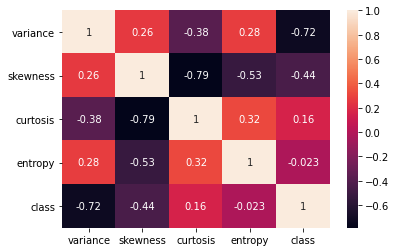

In [9]:
sns.heatmap(data.corr(),annot=True)

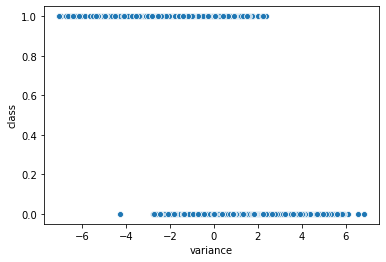

In [11]:
sns.scatterplot(data=data,x='variance',y='class')

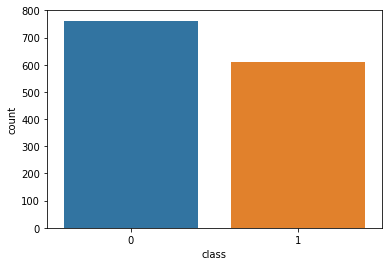

In [12]:
sns.countplot(data=data,x='class')

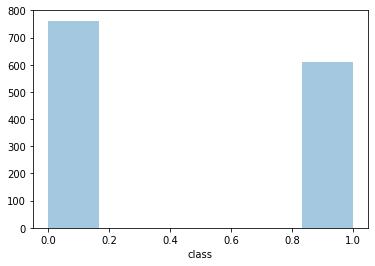

In [13]:
sns.distplot(a=data['class'],kde=False)

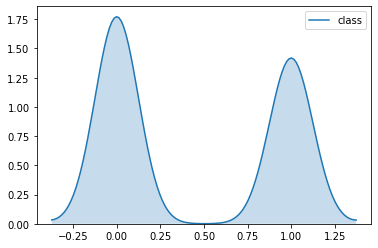

In [14]:
sns.kdeplot(data=data['class'],shade=True)

In [15]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [16]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import

In [24]:
from sklearn.model_selection import GridSearchCV

In [21]:
scaler=StandardScaler()

In [22]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
X_train

array([[-2.75859469e-03, -2.65345190e-01, -5.23948417e-01,
         1.00867393e+00],
       [ 4.54033168e-02,  5.86365657e-01, -7.47094534e-02,
         3.19918558e-01],
       [-6.01890383e-01, -5.26688075e-01,  2.06913924e-01,
         9.14606661e-01],
       ...,
       [-4.58069217e-01, -2.87540866e-01, -3.33316324e-01,
         3.53421832e-01],
       [-2.41292875e+00,  1.29628473e+00, -3.22624900e-01,
        -2.85067009e+00],
       [-1.27381101e-01, -8.91137306e-01, -2.29066808e-03,
         1.20584698e+00]])

In [38]:
RFC=RandomForestClassifier()
parameters={'n_estimators':[100,150,50,200],'random_state':[0,7,8,9,10]}
randomFC=GridSearchCV(RFC,param_grid=parameters,scoring='f1',cv=5)
randomFC.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [39]:
print(randomFC.best_params_)

{'n_estimators': 100, 'random_state': 7}


In [40]:
print(randomFC.best_score_)

0.993076638843138


In [35]:
lgbC=lgb.LGBMClassifier()
param_grid={'learning_rate':[0.1,0.001,1],
            'n_estimators':[50,100,150],
            'boosting_type':['gbdt','dart'],
            'num_leaves':[15,31,50]}
gridSearch=GridSearchCV(lgbC,param_grid=param_grid,scoring=['accuracy','f1'],refit='f1',verbose=100)
gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] boosting_type=gbdt, learning_rate=0.1, n_estimators=50, num_leaves=15 
[CV]  boosting_type=gbdt, learning_rate=0.1, n_estimators=50, num_leaves=15, accuracy=1.000, f1=1.000, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] boosting_type=gbdt, learning_rate=0.1, n_estimators=50, num_leaves=15 
[CV]  boosting_type=gbdt, learning_rate=0.1, n_estimators=50, num_leaves=15, accuracy=0.990, f1=0.988, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] boosting_type=gbdt, learning_rate=0.1, n_estimators=50, num_leaves=15 
[CV]  boosting_type=gbdt, learning_rate=0.1, n_estimators=50, num_leaves=15, accuracy=0.969, f1=0.965, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[CV] boosting_type=gbdt, learning_rate

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learn

In [36]:
print(gridSearch.best_params_)

{'boosting_type': 'dart', 'learning_rate': 1, 'n_estimators': 50, 'num_leaves': 15}


In [37]:
print(gridSearch.best_score_)

0.9941792465660274


In [41]:
from  joblib import dump,load

In [42]:
dump(gridSearch.best_params_,'gridSearch.joblib')

['gridSearch.joblib']

In [43]:
gridSearch=load('gridSearch.joblib')

In [45]:
gridSearch

{'boosting_type': 'dart',
 'learning_rate': 1,
 'n_estimators': 50,
 'num_leaves': 15}

In [49]:
lgbm=lgb.LGBMClassifier(boosting_type='dart',learning_rate=1,n_estimators=50,num_leaves=15)

In [50]:
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_leaves=15, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
predictions=lgbm.predict(X_test)

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [54]:
f1_score(y_test,predictions)

0.9972602739726028

In [55]:
accuracy_score(y_test,predictions)

0.9975728155339806

In [56]:
import pickle
pickle_out=open('LGBMClasifier.pkl','wb')
pickle.dump(lgbm,pickle_out)
pickle_out.close()

In [58]:
 lgbm.predict([[2,3,4,1]])

array([0])